In [1]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Este é o dicionário de dados para o dataset do Projeto 1:
1. **ID**: Identificador único do cliente.
2. **Ano_Nascimento**: Ano de nascimento do cliente.
3. **Educacao**: Nível de educação do cliente (ex.: Graduação, PhD).
4. **Estado_Civil**: Estado civil do cliente (ex.: Casado, Solteiro).
5. **Renda**: Renda anual do cliente em reais.
6. **Criancas_Em_Casa**: Número de crianças pequenas na casa do cliente.
7. **Adolescentes_Em_Casa**: Número de adolescentes na casa do cliente.
8. **Data_Cadastro_Cliente**: Data em que o cliente foi cadastrado na empresa.
9. **Gasto_Vinhos**: Total gasto em vinhos no último ano.
10. **Gasto_Frutas**: Total gasto em frutas no último ano.
11. **Gasto_Carnes**: Total gasto em carnes no último ano.
12. **Gasto_Peixes**: Total gasto em peixes no último ano.
13. **Gasto_Doces**: Total gasto em doces no último ano.
14. **Gasto_Outros**: Total gasto em outros produtos no último ano.
15. **Num_Compras_Desconto**: Número de compras feitas com desconto.
16. **Num_Compras_Web**: Número de compras feitas através da web.
17. **Num_Compras_Catalogo**: Número de compras feitas usando um catálogo.
18. **Num_Compras_Loja**: Número de compras feitas diretamente na loja.
19. **Num_Visitas_Web_Mes**: Número de visitas ao site da empresa por mês.
20. **Aceitou_Campanha_1**: Indica se o cliente aceitou a oferta na primeira campanha (0 = Não, 1 = Sim)
21. **Aceitou_Campanha_2**: Indica se o cliente aceitou a oferta na segunda campanha (0 = Não, 1 = Sim).
22. **Aceitou_Campanha_3**: Indica se o cliente aceitou a oferta na terceira campanha (0 = Não, 1 = Sim).
23. **Aceitou_Campanha_4**: Indica se o cliente aceitou a oferta na quarta campanha (0 = Não, 1 = Sim).
24. **Aceitou_Campanha_5**: Indica se o cliente aceitou a oferta na quinta campanha (0 = Não, 1 = Sim).
25. **Aceitou_Campanha_6**: Indica se o cliente aceitou a oferta na sexta campanha (0 = Não, 1 = Sim)



In [2]:
archive = 'data/dataset.csv'

df = pd.read_csv(archive)
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

In [4]:
df.columns

Index(['ID', ' Ano_Nascimento', ' Educacao', ' Estado_Civil', ' Renda',
       ' Criancas_Em_Casa', ' Adolescentes_Em_Casa', ' Data_Cadastro_Cliente',
       ' Gasto_Vinhos', ' Gasto_Frutas', ' Gasto_Carnes', ' Gasto_Peixes',
       ' Gasto_Doces', ' Gasto_Outros', ' Num_Compras_Promocionais',
       ' Num_Compras_Web', ' Num_Compras_Catalogo', ' Num_Compras_Loja',
       ' Num_Visitas_Web_Mes', ' Aceitou_Campanha_1', ' Aceitou_Campanha_2',
       ' Aceitou_Campanha_3', ' Aceitou_Campanha_4', ' Aceitou_Campanha_5',
       ' Aceitou_Campanha_6'],
      dtype='object')

## Limpeza e processamento inicial dos dados

In [5]:
df.columns = df.columns.str.replace(' ', '') 
df.columns = [x.lower() for x in df.columns]

df['renda'] = df['renda'].replace('[\$,]', '', regex=True).astype(float)
df['data_cadastro_cliente'] = pd.to_datetime(df['data_cadastro_cliente']) 

# df['aceitou_campanha_1'] = df['aceitou_campanha_1'].astype('category')
# df['aceitou_campanha_2'] = df['aceitou_campanha_2'].astype('category')
# df['aceitou_campanha_3'] = df['aceitou_campanha_3'].astype('category')
# df['aceitou_campanha_4'] = df['aceitou_campanha_4'].astype('category')
# df['aceitou_campanha_5'] = df['aceitou_campanha_5'].astype('category')
# df['aceitou_campanha_6'] = df['aceitou_campanha_6'].astype('category')

In [6]:
df.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,num_compras_web,num_compras_catalogo,num_compras_loja,num_visitas_web_mes,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2237 non-null   int64         
 1   ano_nascimento            2237 non-null   int64         
 2   educacao                  2237 non-null   object        
 3   estado_civil              2237 non-null   object        
 4   renda                     2213 non-null   float64       
 5   criancas_em_casa          2237 non-null   int64         
 6   adolescentes_em_casa      2237 non-null   int64         
 7   data_cadastro_cliente     2237 non-null   datetime64[ns]
 8   gasto_vinhos              2237 non-null   int64         
 9   gasto_frutas              2237 non-null   int64         
 10  gasto_carnes              2237 non-null   int64         
 11  gasto_peixes              2237 non-null   int64         
 12  gasto_doces         

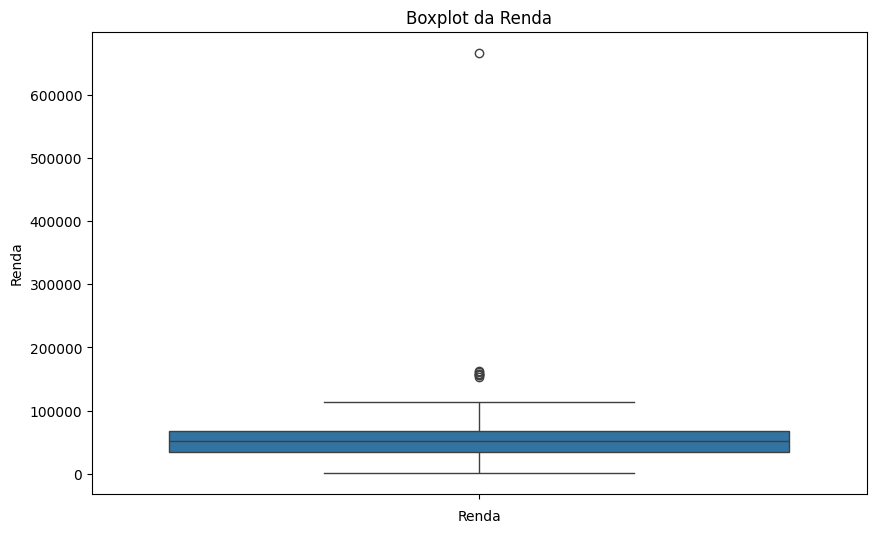

In [8]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.ylabel('Renda')
plt.show()

In [9]:
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'O valor {lower_bound} está abaixo do padrão')
print(f'O valor {upper_bound} está acima do padrão')

O valor -14615.5 está abaixo do padrão
O valor 118348.5 está acima do padrão


<Figure size 1000x600 with 0 Axes>

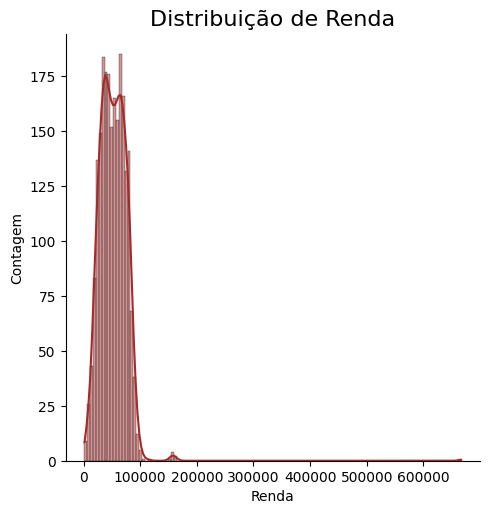

In [10]:
plt.figure(figsize = (10, 6)) 
sns.displot(df['renda'], color = 'brown', kde=True)  
plt.title('Distribuição de Renda', size = 16)  
plt.xlabel('Renda')
plt.ylabel('Contagem')
plt.show()

Existem várias estratégias para tratar outliers em um conjunto de dados e a escolha da melhor abordagem depende do contexto específico e do objetivo da análise. Aqui estão algumas opções comuns:

**Remoção**: Simplesmente remover os outliers do conjunto de dados. Esta é uma abordagem direta, mas pode não ser ideal se o número de outliers for significativo ou se esses pontos contiverem informações importantes.

**Substituição**: Substituir os valores dos outliers por outros mais representativos, como a média ou mediana dos dados. Esta abordagem é útil se os outliers forem considerados erros de medição ou entrada de dados.

**Transformação**: Aplicar uma transformação aos dados pode reduzir o impacto dos outliers. Transformações comuns incluem logarítmica, raiz quadrada ou Box-Cox.

**Capping (Limitação)**: Definir um limite superior e/ou inferior para os valores dos dados. Valores além desses limites são trazidos para o limite mais próximo. Por exemplo, todos os valores acima do limite superior são definidos para esse limite.

**Análise Separada**: Às vezes, os outliers são mantidos no conjunto de dados e analisados separadamente para entender melhor suas características.

**Análise de Causa**: Investigar a causa dos outliers. Se eles são resultado de um fenômeno real, pode ser importante incluí-los na análise.

A escolha do método depende da natureza dos dados e do objetivo da análise. Em muitos casos, uma combinação dessas estratégias pode ser a mais eficaz. 

In [11]:
df = df[(df['renda'] >= lower_bound) & (df['renda'] <= upper_bound)]

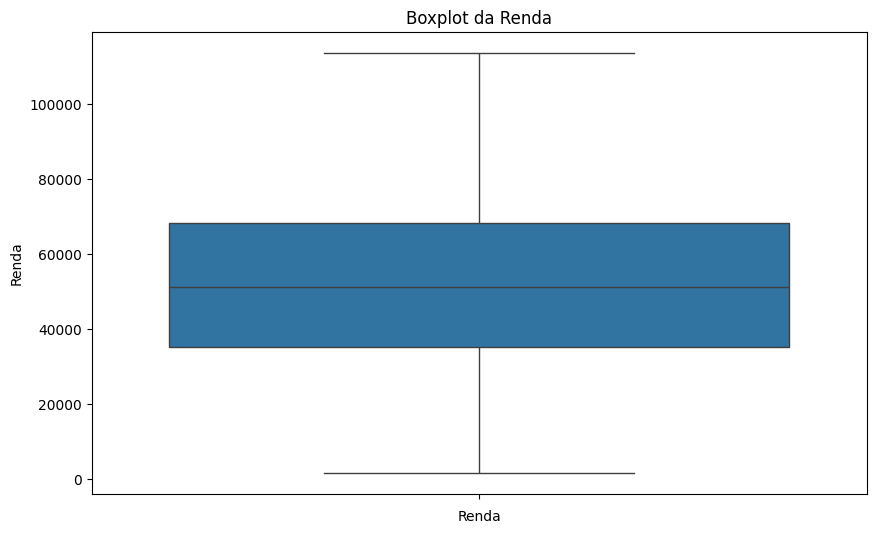

In [12]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.ylabel('Renda')
plt.show()

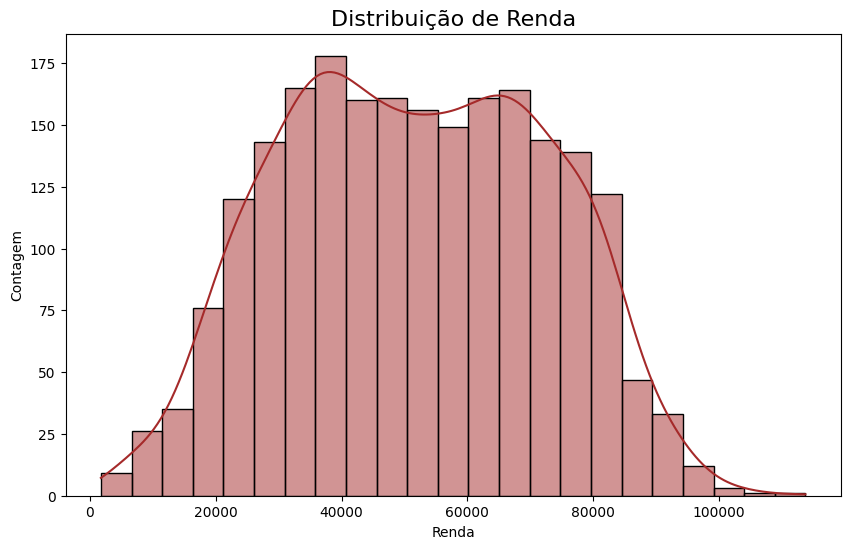

In [13]:
plt.figure(figsize = (10, 6)) 
sns.histplot(df['renda'], color = 'brown', kde=True)  
plt.title('Distribuição de Renda', size = 16)  
plt.xlabel('Renda')
plt.ylabel('Contagem')
plt.show()

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['renda']])

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_scaled)

df['renda'] = scaler.inverse_transform(df_imputed)
print(f'Total de valores Ausentes: {df.isnull().sum().sum()}')

Total de valores Ausentes: 0


## Análise Exploratória e Engenharia de Atributos

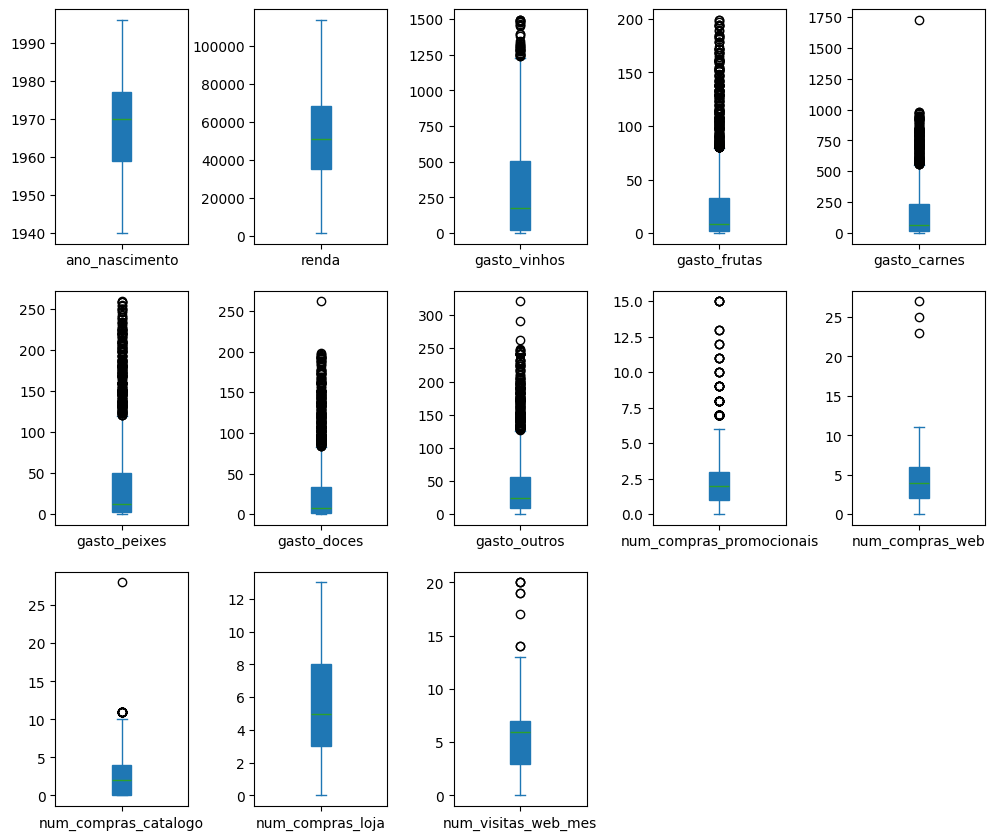

In [15]:
data_boxplot = df.drop(columns = ['id',
                                  'educacao',
                                  'estado_civil',
                                  'criancas_em_casa',
                                  'data_cadastro_cliente',
                                  'adolescentes_em_casa', 
                                  'aceitou_campanha_1', 
                                  'aceitou_campanha_2',
                                  'aceitou_campanha_3', 
                                  'aceitou_campanha_4', 
                                  'aceitou_campanha_5',
                                  'aceitou_campanha_6'])

data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

> Vamos transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai nos ajudar na exploração dos dados.

In [16]:
ano_atual = datetime.now().year
df['idade'] = ano_atual - df['ano_nascimento']
df['dias_como_cliente'] = (df['data_cadastro_cliente'].max() - df['data_cadastro_cliente']).dt.days
df['total_compras'] = df['num_compras_web'] + df['num_compras_catalogo'] + df['num_compras_loja']
df['gasto_total'] = df.filter(like = 'gasto').sum(axis=1)
df['aceite_campanha'] = df.filter(like = 'aceitou').max(axis = 1)
df['resposta_campanha'] = df['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')
df.head()

,id,ano_nascimento,educacao,estado_civil,renda,criancas_em_casa,adolescentes_em_casa,data_cadastro_cliente,gasto_vinhos,gasto_frutas,...,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total,aceite_campanha,resposta_campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,47,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,64,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,54,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,55,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,45,2665,19,758,0,Não Aceitou


In [17]:
df['aceite_campanha'].value_counts()

aceite_campanha
0    1601
1     604
Name: count, dtype: int64

In [18]:
df['resposta_campanha'].value_counts()

resposta_campanha
Não Aceitou    1601
Aceitou         604
Name: count, dtype: int64

In [19]:
df = df.drop(['ano_nascimento', 'data_cadastro_cliente', 'aceite_campanha'], axis = 1)

In [20]:
df.describe()

,id,renda,criancas_em_casa,adolescentes_em_casa,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_outros,...,aceitou_campanha_1,aceitou_campanha_2,aceitou_campanha_3,aceitou_campanha_4,aceitou_campanha_5,aceitou_campanha_6,idade,dias_como_cliente,total_compras,gasto_total
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,55.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,47.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,65.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,84.000000,4915.000000,32.000000,2525.000000


## Extraindo Insights com Análise Multivariada

Vamos analisar os dados e extrair insights respondendo diversas perguntas de negócio.

### Qual o Comportamento (Distribuição) das Variáveis?

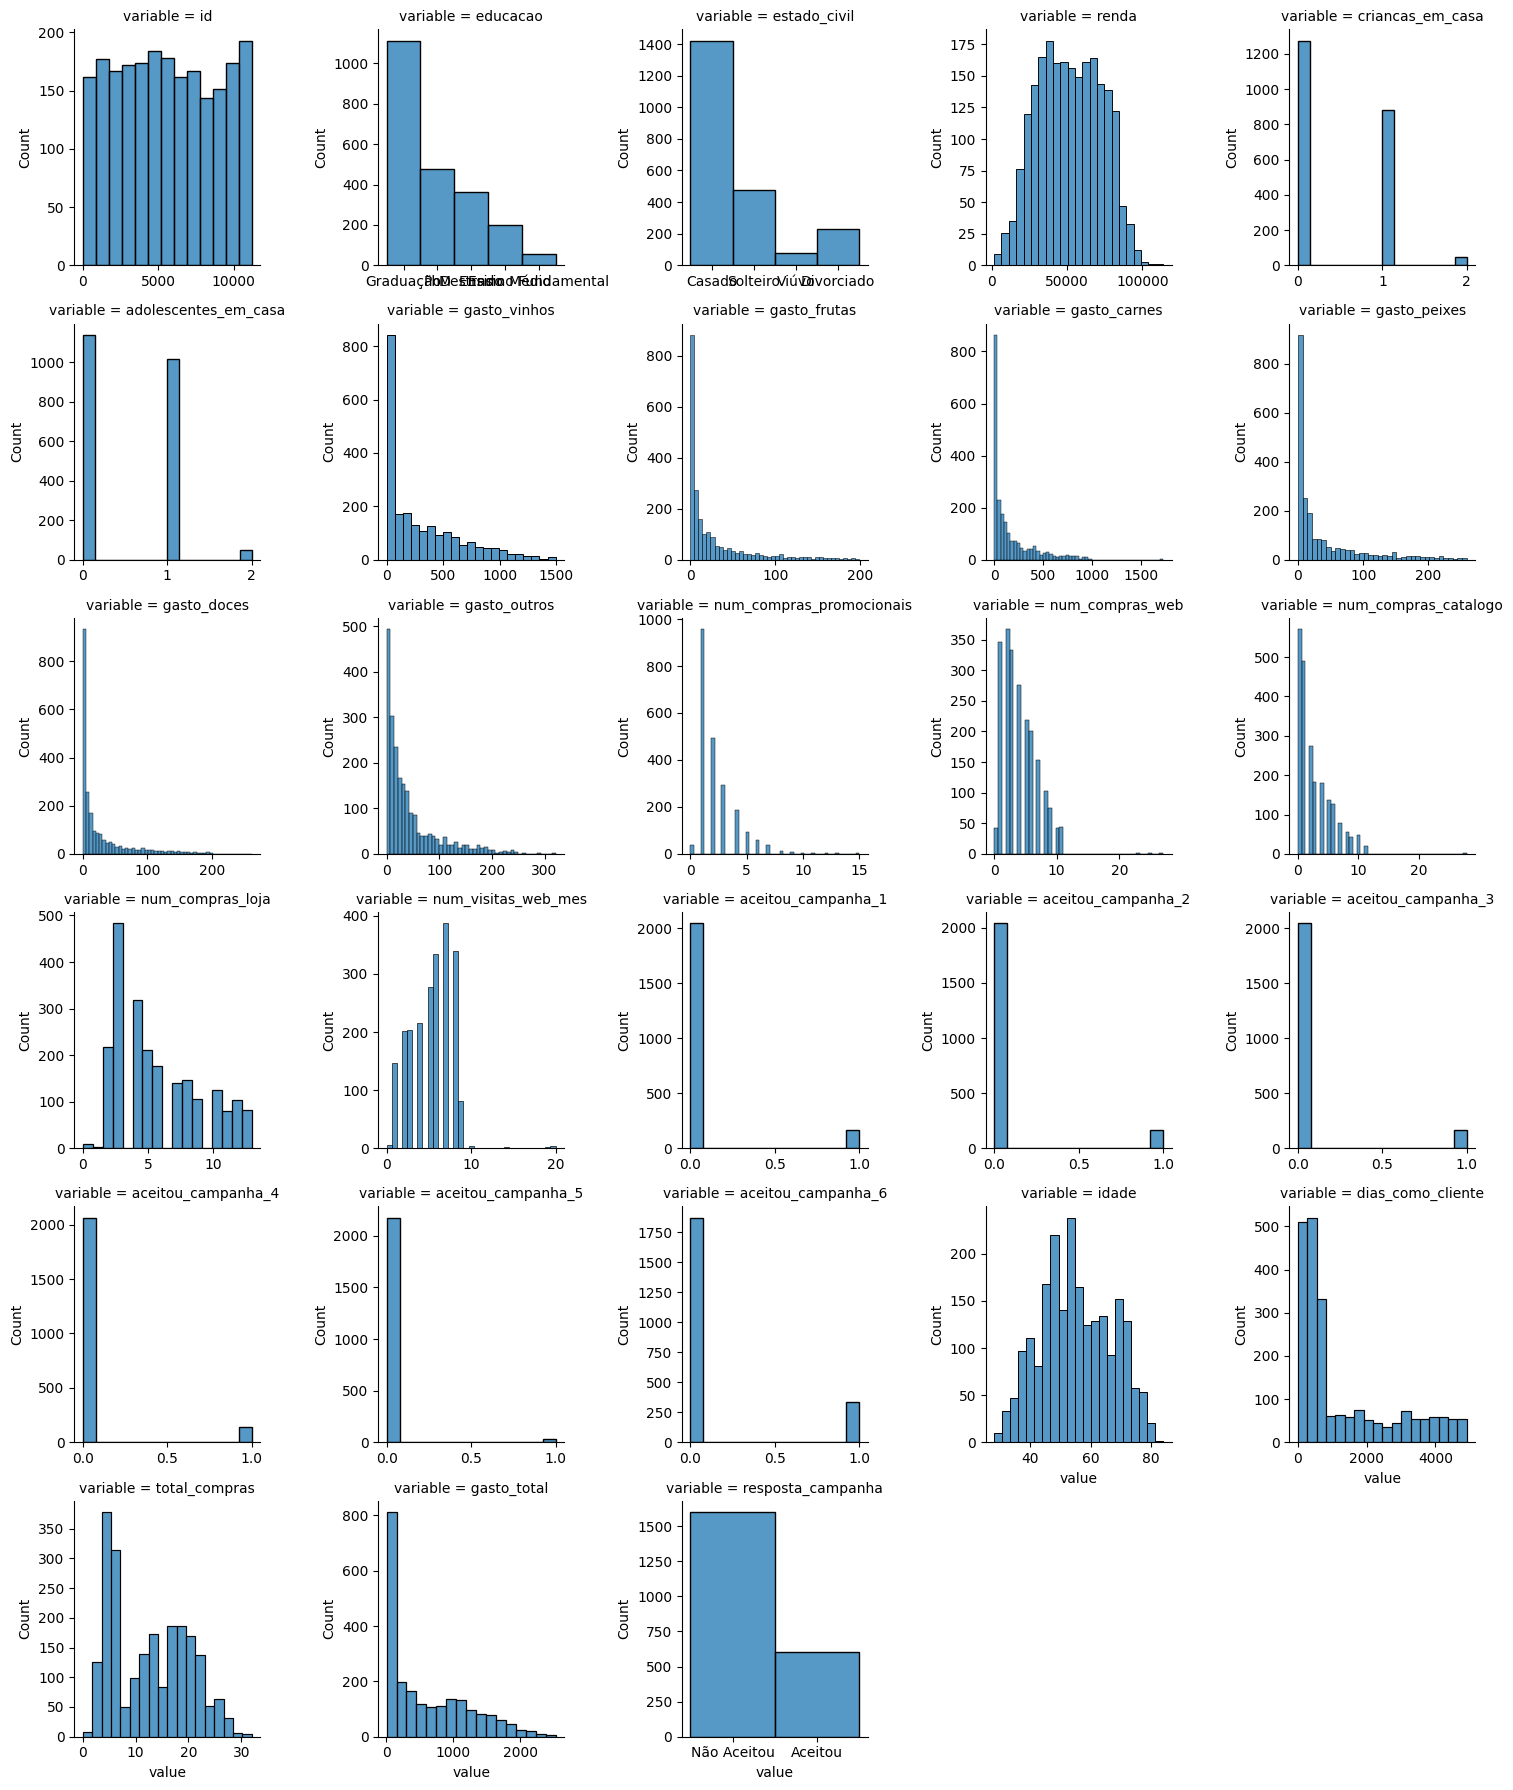

In [21]:
# Distribuição das Variáveis
hist = pd.melt(df, value_vars = df )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value');

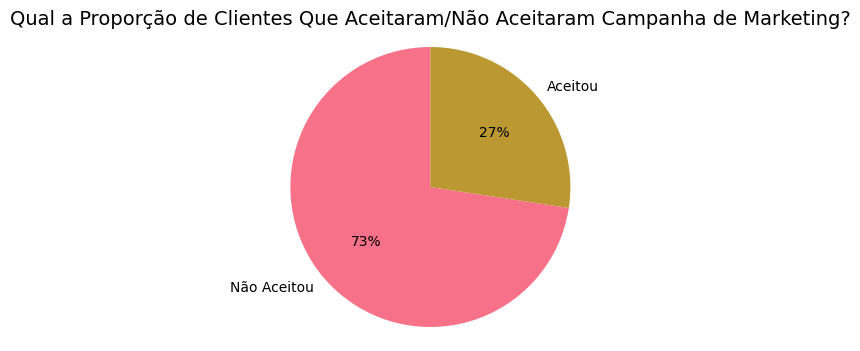

In [22]:
fig, ax = plt.subplots(figsize = (6, 4))
counts = df['resposta_campanha'].value_counts()
labels = counts.index.tolist()
colors = sns.color_palette('husl')
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize = 14)
ax.axis('equal')
plt.show();

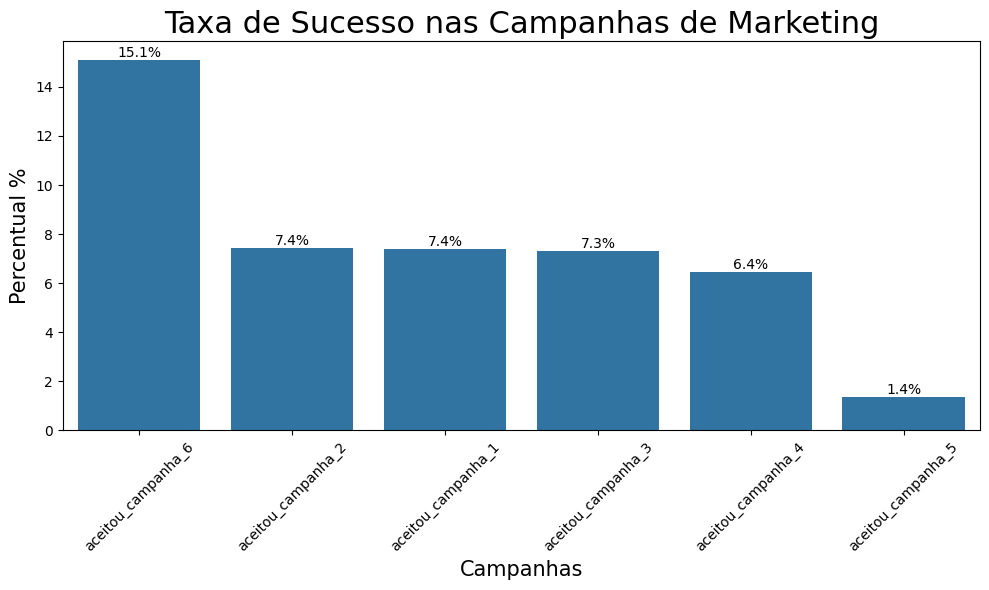

In [23]:

Campanhas = ['aceitou_campanha_1', 
             'aceitou_campanha_2', 
             'aceitou_campanha_3', 
             'aceitou_campanha_4', 
             'aceitou_campanha_5', 
             'aceitou_campanha_6']


campaigns = pd.DataFrame(df[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))


plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size = 22)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')


ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.tight_layout()
plt.show()

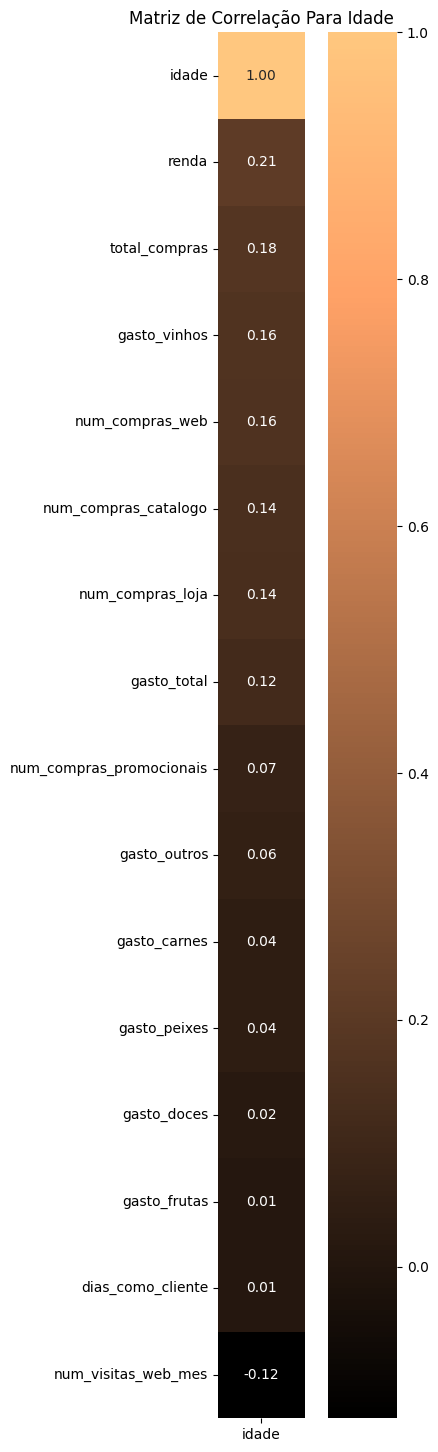

In [24]:
# A Idade Tem Influência nas Decisões de Gastos dos Clientes?
df_corr = df.drop(['id',
                   'educacao',
                   'estado_civil',
                   'criancas_em_casa',
                   'adolescentes_em_casa', 
                   'aceitou_campanha_1', 
                   'aceitou_campanha_2',
                   'aceitou_campanha_3', 
                   'aceitou_campanha_4', 
                   'aceitou_campanha_5',
                   'aceitou_campanha_6', 
                   'educacao',
                   'resposta_campanha'], axis = 1).corr()

column_corr = df_corr.loc['idade']

plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

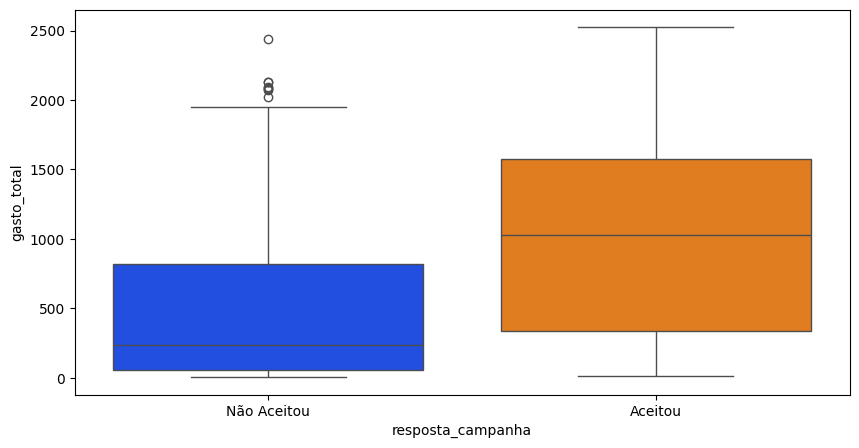

In [25]:
# Qual a Relação Entre Gasto Total e Resposta às Campanhas de Marketing?
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'gasto_total', data = df, palette = 'bright');

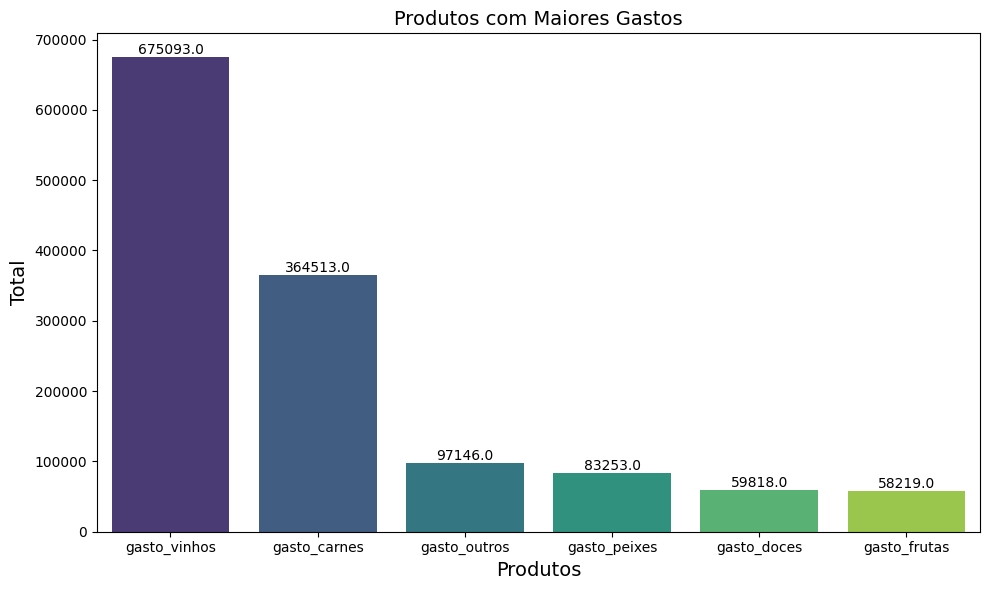

In [26]:
# Em Qual Categoria de Produto os Clientes Têm Maior Gasto?
produtos = ['gasto_vinhos', 
            'gasto_frutas',
            'gasto_carnes', 
            'gasto_peixes',
            'gasto_doces',
            'gasto_outros']

df_produtos = pd.DataFrame(df[produtos].sum(), columns = ['Sum']).reset_index()

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_produtos.sort_values('Sum', ascending = False), 
                 palette = 'viridis')


plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')


plt.tight_layout()
plt.show()

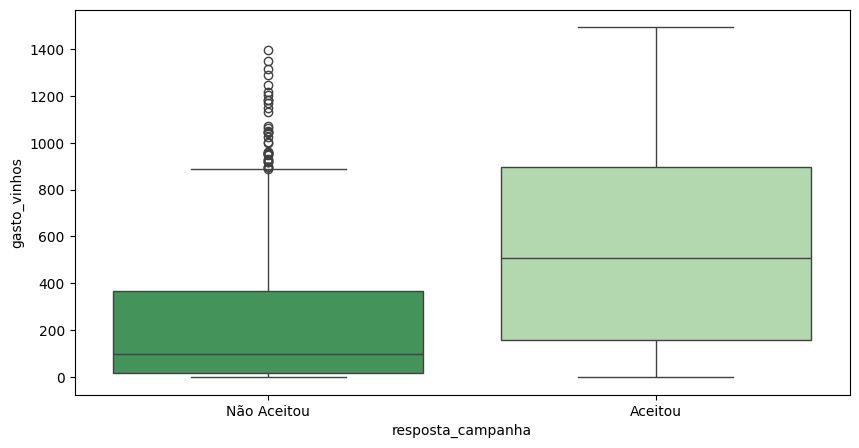

In [27]:
### Qual a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing?
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'gasto_vinhos', data = df, palette = 'Greens_r');

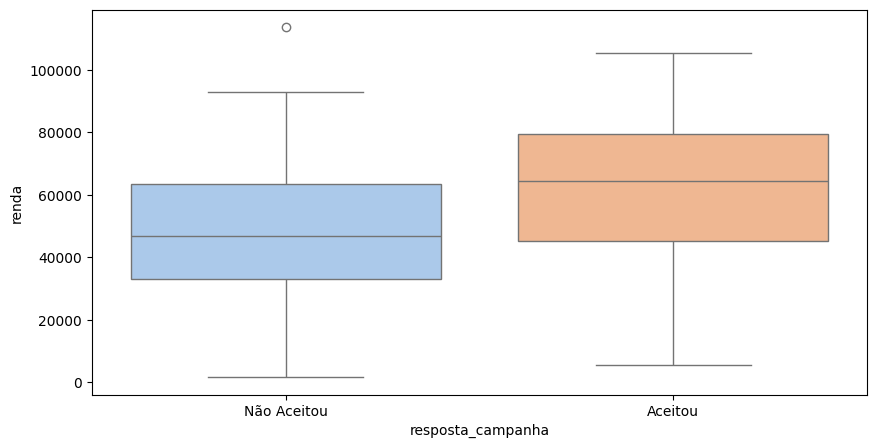

In [28]:
### Qual a Relação Entre Renda e Resposta às Campanhas de Marketing?
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'resposta_campanha', y = 'renda', data = df, palette = 'pastel');

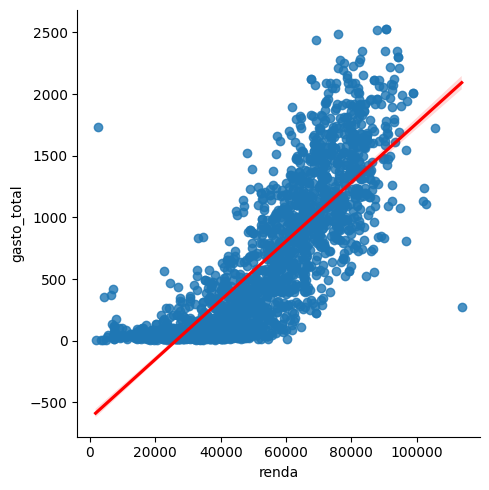

In [29]:
### Qual a Relação Entre Renda e Gasto Total?
# Plot
sns.lmplot(x = 'renda', y = 'gasto_total', data = df, palette = 'blue', line_kws = {'color': 'red'});

In [30]:
### Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha?
df_imp = pd.get_dummies(df, columns = ['educacao', 'estado_civil'])

X = df_imp.drop(['id',
                 'gasto_vinhos', 
                 'gasto_frutas', 
                 'gasto_carnes', 
                 'gasto_peixes',
                 'gasto_doces', 
                 'gasto_outros',
                 'num_compras_web', 
                 'num_compras_catalogo', 
                 'num_compras_loja',
                 'aceitou_campanha_1', 
                 'aceitou_campanha_2', 
                 'aceitou_campanha_3', 
                 'aceitou_campanha_4', 
                 'aceitou_campanha_5', 
                 'aceitou_campanha_6',
                 'resposta_campanha'], axis = 1)

y = df_imp['resposta_campanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)   
# Treina o modelo
modelo_dsa = modelo_rf.fit(X,y)
# Extrai a importância de cada variável
importances = modelo_dsa.feature_importances_
# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo_dsa.estimators_], axis = 0)
# Índices
indices = np.argsort(importances)

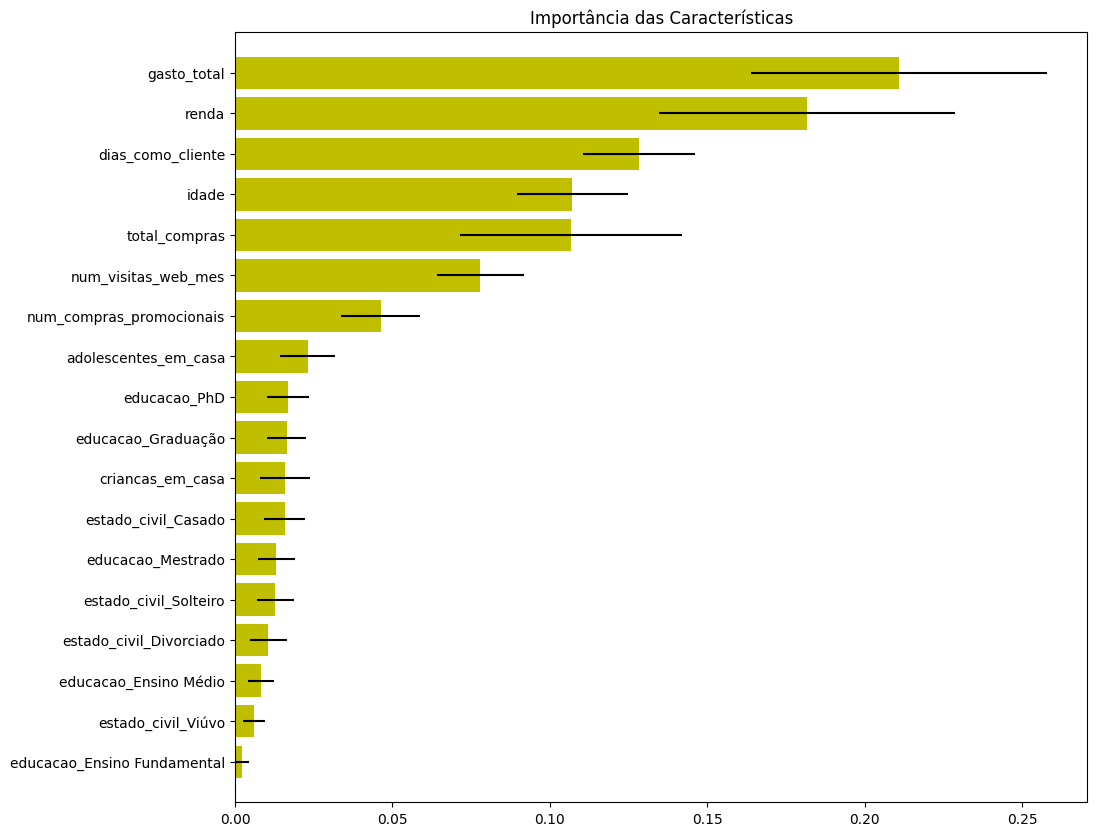

In [31]:
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show();

## Teste de Hipóteses

Nível educacional não parece ser relevante para explicar a resposta do cliente à campanha de Marketing. Por outro lado, Renda é bastante relevante. É provável que a média de renda seja diferente entre os níveis educacionais.

Vamos testar a hipótese de que existe diferença significativa entre as médias de Renda dos clientes Com Ensino Superior e Sem Ensino Superior. Antes, vamos explorar essa relação.

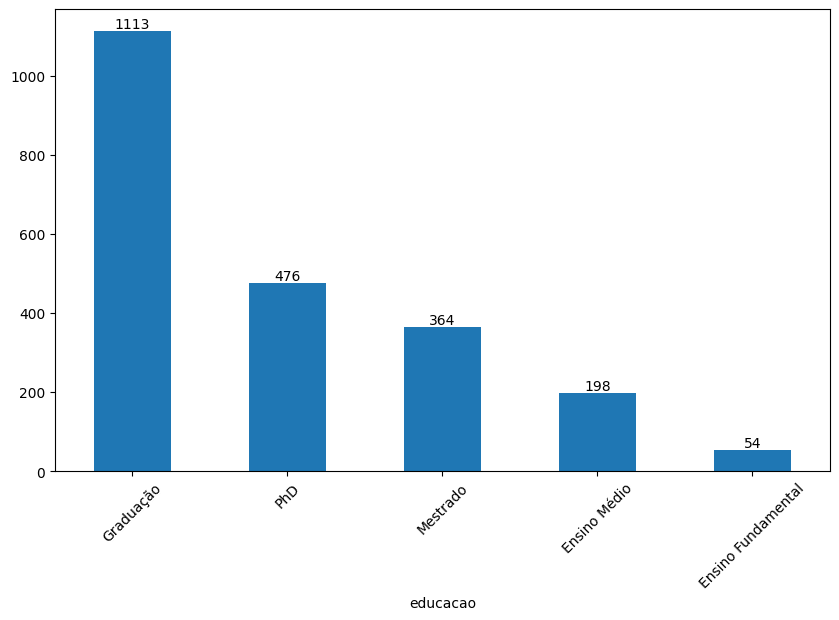

In [32]:
plt.figure(figsize = (10, 6))
ax = df['educacao'].value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

> Média de Renda Por Nível Educacional 

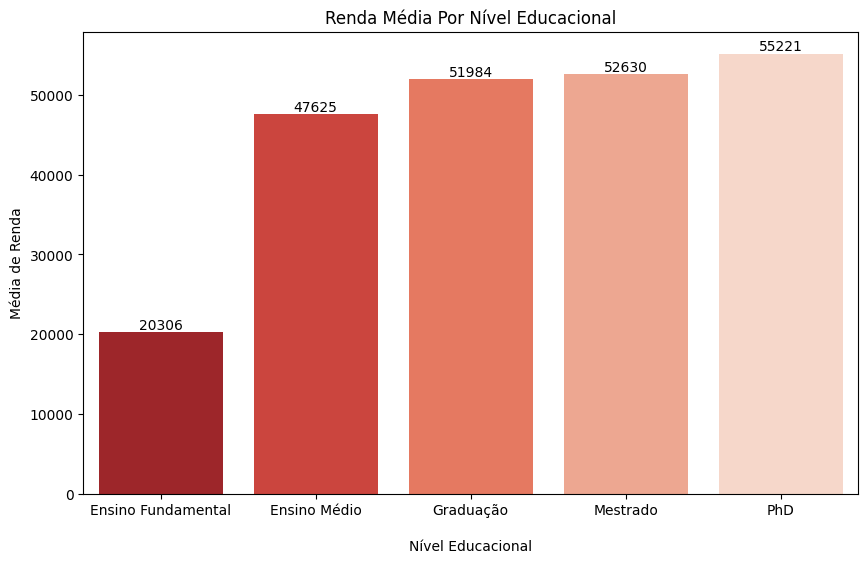

In [33]:
media_renda = df.groupby('educacao')['renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'renda')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['educacao'], y = media_renda['renda'], data = df, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

### Definindo as Hipóteses

Para escolher o Teste de Hipóteses precisamos verificar se as variáveis seguem ou não uma distribuição normal. Se as variáveis seguirem uma distribuição normal podemos usar um teste paramétrico. Caso contrário, devemos usar um teste não paramétrico.

**Hipótese Nula (H0)**: A hipótese nula é uma declaração de "não diferença". Em nosso caso, ela afirma que "Não há diferença significativa nas médias de renda de grupos com e sem nível superior". Isso significa que qualquer diferença observada nos dados entre os grupos pode ser atribuída ao acaso.

**Hipótese Alternativa (H1)**: A hipótese alternativa contrapõe a hipótese nula. Ela afirma que "Há uma diferença significativa nas médias de renda de grupos com e sem nível superior". Isso implica que as diferenças observadas são reais e não apenas resultado de variações aleatórias.

Quando você realiza um teste estatístico (como um teste t de Student para amostras independentes ou um teste não paramétrico como o Mann-Whitney U se as suposições do teste t não são atendidas), você está testando essas hipóteses. O resultado do teste (em especial, o valor-p) indica se você deve ou não rejeitar a hipótese nula:

**Valor-p Baixo (tipicamente < 0,05)**: Se o valor-p do teste for menor que o nível de significância escolhido (geralmente 0,05), você rejeita a hipótese nula, sugerindo que há evidências suficientes para afirmar que existe uma diferença significativa nas médias de renda entre os grupos.

**Valor-p Alto**: Se o valor-p for maior que o nível de significância, você não rejeita a hipótese nula, indicando que não há evidências suficientes para afirmar que existe uma diferença significativa.

É importante lembrar que "não rejeitar a hipótese nula" não é o mesmo que provar que a hipótese nula é verdadeira. Significa apenas que, com os dados disponíveis, não há evidências suficientes para apoiar a hipótese alternativa.

In [36]:
# Representação numérica da variável categórica
df['educacao'] = df['educacao'].map({'Ensino Fundamental':1,
                                      'Ensino Médio':2,
                                      'Graduação':3,
                                      'Mestrado':4,
                                      'PhD':5})

# Dados que serão testados
dados_para_testar = df[['renda', 'educacao']]

### Aplicando o Teste de Normalidade Para Selecionar o Teste de Hipóteses Adequado

O Teste de Shapiro-Wilk é um teste estatístico usado para avaliar a normalidade de uma distribuição de dados. Este teste é especialmente útil para amostras pequenas (geralmente, menos de 50 observações), embora também possa ser aplicado a conjuntos de dados maiores. As hipóteses para o Teste de Shapiro-Wilk são formuladas da seguinte forma:

**Hipótese Nula (H0)**: A hipótese nula do Teste de Shapiro-Wilk afirma que os dados seguem uma distribuição normal. Em outras palavras, assume-se que a distribuição da amostra em questão não difere significativamente de uma distribuição normal teórica.

**Hipótese Alternativa (H1)**: A hipótese alternativa é que os dados não seguem uma distribuição normal. Isso significa que há evidências suficientes nos dados para sugerir que a distribuição se desvia da normalidade.

Ao realizar o Teste de Shapiro-Wilk, você calcula um valor-p que indica a probabilidade de obter a amostra observada (ou uma mais extrema) assumindo que a hipótese nula seja verdadeira.

Se o valor-p for baixo (geralmente, menor que o nível de significância escolhido, como 0,05), você rejeita a hipótese nula, sugerindo que os dados não vêm de uma distribuição normal.

Se o valor-p for alto, você não rejeita a hipótese nula, o que indica que não há evidências suficientes para afirmar que os dados não seguem uma distribuição normal.

É importante notar que o Teste de Shapiro-Wilk, como outros testes de normalidade, pode ser sensível ao tamanho da amostra. Com amostras muito grandes, o teste pode detectar pequenos desvios da normalidade que podem não ser relevantes na prática. Por outro lado, em amostras muito pequenas, o teste pode não ter poder suficiente para detectar desvios significativos da normalidade.

In [37]:
# Teste Shapiro-Wilk 
def testa_normal(columns):
    for column in columns:
        statistic, p_value = shapiro(dados_para_testar[column])
        alpha = 0.05
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

testa_normal(dados_para_testar)


renda: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

educacao: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


### Aplicando Teste de Hipóteses Não Paramétrico
O teste de Mann-Whitney U é uma técnica estatística usada para comparar diferenças entre dois grupos independentes quando os dados não seguem necessariamente uma distribuição normal. Este teste é uma alternativa não paramétrica ao teste t de Student para amostras independentes e é frequentemente usado quando as condições para o teste t não são atendidas (por exemplo, quando a distribuição dos dados é significativamente não normal).

In [39]:
grupo_com_graduacao = df[df['educacao'].isin([5, 4, 3])]['renda']
grupo_sem_graduacao = df[df['educacao'].isin([1, 2])]['renda']

# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")

Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.


## Conclusão

Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são o histórico de gasto total, a renda, o tempo total como cliente, idade e total de compras anteriores. Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.

O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. Decidimos então aplicar um teste de hipóteses.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. Vimos ainda que níveis educacionais mais altos têm média de renda maior.

Logo, a empresa deveria segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.